<a href="https://colab.research.google.com/github/Amithashreshta/255/blob/main/CMPE_255_Project_US_traffic_accident_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis

## Exploratory Data Analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler


In [3]:
!ls '/content/drive/'

MyDrive


In [4]:
df = pd.read_csv('/content/drive/My Drive/US_Accidents_June20.csv')
df

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,A-3513776,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3513613,A-3513777,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3513614,A-3513778,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3513615,A-3513779,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [ ]:
df.nunique()

ID                       3513617
Source                         3
TMC                           21
Severity                       4
Start_Time               3200042
End_Time                 3246120
Start_Lat                1124695
Start_Lng                1113407
End_Lat                   375074
End_Lng                   383569
Distance(mi)               13476
Description              1780092
Number                     40365
Street                    176262
Side                           3
City                       11895
County                      1724
State                         49
Zipcode                   418780
Country                        1
Timezone                       4
Airport_Code                2001
Weather_Timestamp         546086
Temperature(F)               831
Wind_Chill(F)                974
Humidity(%)                  100
Pressure(in)                1022
Visibility(mi)                85
Wind_Direction                24
Wind_Speed(mph)              160
Precipitat

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


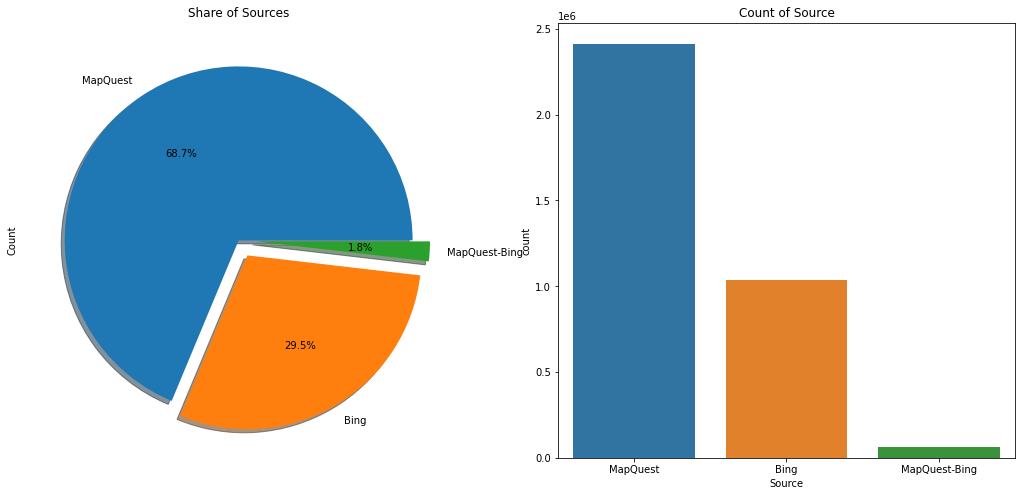

In [ ]:
## Source visualisation
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Source'].value_counts().plot.pie(explode=[0,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Sources')
ax[0].set_ylabel('Count')
sns.countplot('Source',data=df,ax=ax[1],order=df['Source'].value_counts().index)
ax[1].set_title('Count of Source')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


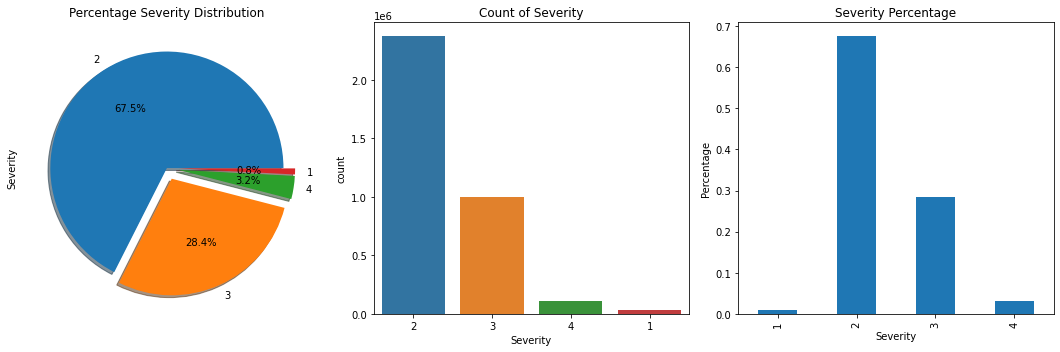

In [ ]:
## Severity distribution
f,ax=plt.subplots(1,3,figsize=(15,5))
df['Severity'].value_counts().plot.pie(explode=[0,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Percentage Severity Distribution')
#ax[0].set_ylabel('Count')
sns.countplot('Severity',data=df,ax=ax[1],order=df['Severity'].value_counts().index)
ax[1].set_title('Count of Severity')
df.Severity.value_counts(normalize=True).sort_index().plot.bar(ax=ax[2])
ax[2].set_title('Severity Percentage')
ax[2].set_xlabel('Severity')
ax[2].set_ylabel('Percentage')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


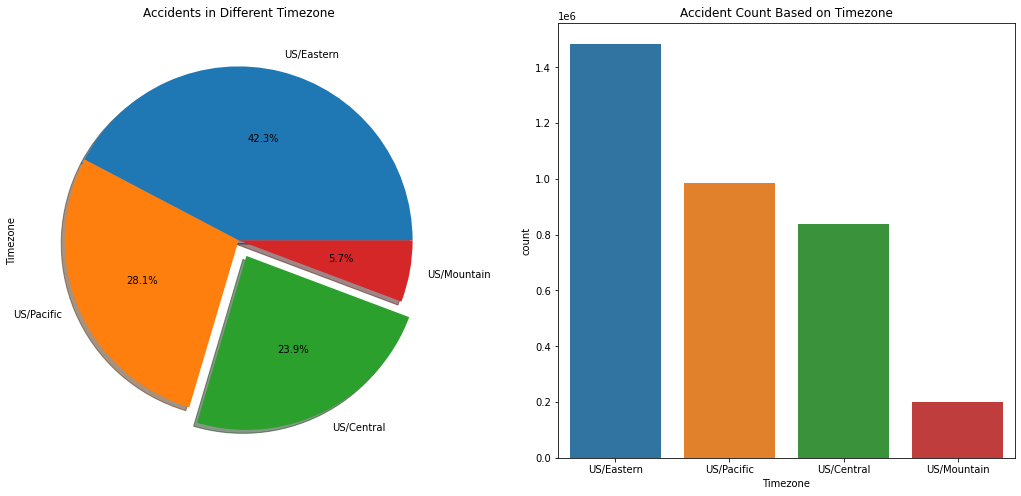

In [ ]:
##Accidents in different time zones
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Timezone'].value_counts().plot.pie(explode=[0,0,0.1,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Accidents in Different Timezone')
#ax[0].set_ylabel('Count')
sns.countplot('Timezone',data=df,ax=ax[1],order=df['Timezone'].value_counts().index)
ax[1].set_title('Accident Count Based on Timezone')
plt.show()


top 20 accident durations correspond to 81.8% of the data


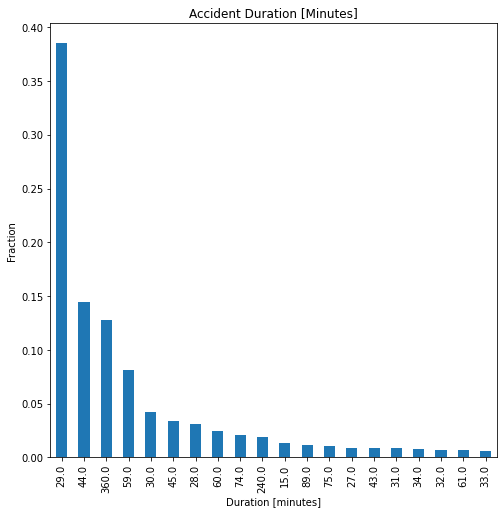

In [ ]:
##accident duration
st = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
end = pd.to_datetime(df.End_Time, format='%Y-%m-%d %H:%M:%S')
diff = (end-st)
top20 = diff.astype('timedelta64[m]').value_counts().nlargest(20)
print('top 20 accident durations correspond to {:.1f}% of the data'.format(top20.sum()*100/len(diff)))
(top20/top20.sum()).plot.bar(figsize=(8,8))
plt.title('Accident Duration [Minutes]')
plt.xlabel('Duration [minutes]')
plt.ylabel('Fraction');

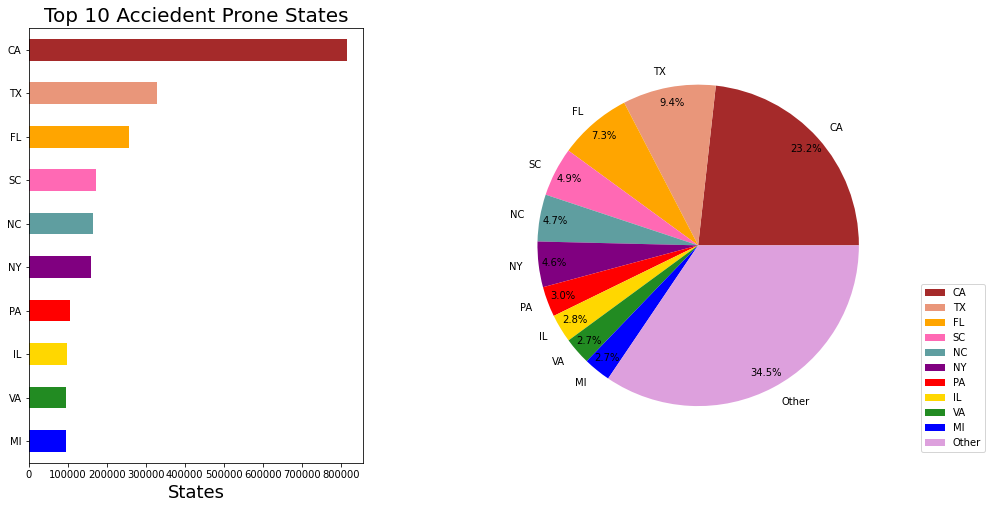

In [ ]:
## Accident prone areas
fig,ax=plt.subplots(1,2,figsize=(15,8))
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
df.State.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=clr,ax=ax[0])
ax[0].set_title("Top 10 Acciedent Prone States",size=20)
ax[0].set_xlabel('States',size=18)


count=df['State'].value_counts()
groups=list(df['State'].value_counts().index)[:10]
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4)) 
plt.subplots_adjust(wspace =0.5, hspace =0)
plt.ioff()
plt.ylabel('')
pass

In [ ]:
df_top_Severity_State = df.groupby('State').agg({'Severity': 'mean'}).sort_values('Severity').reset_index()

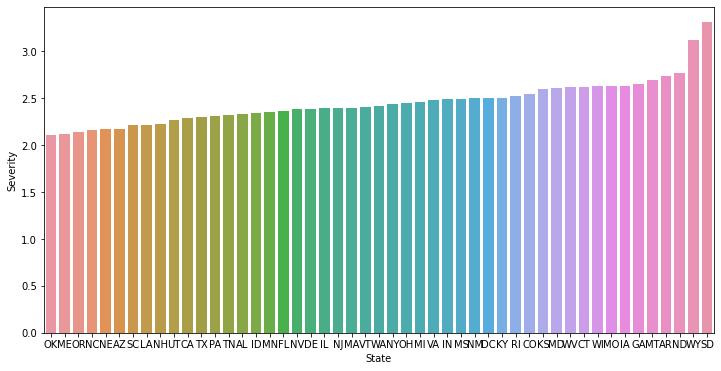

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y="Severity", x="State", data=df_top_Severity_State.head(49))
plt.ioff()

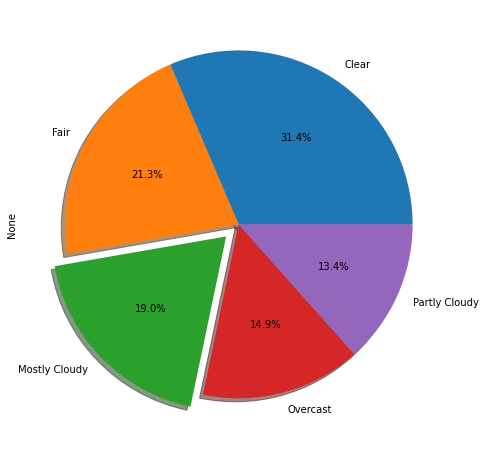

In [ ]:
plt.figure(figsize=(14,8))
df.groupby('Weather_Condition') \
        .size() \
        .sort_values(ascending = False) \
        .iloc[:5] \
        .plot.pie(explode=[0,0,0.1,0,0],autopct='%1.1f%%',shadow=True)
plt.ioff()

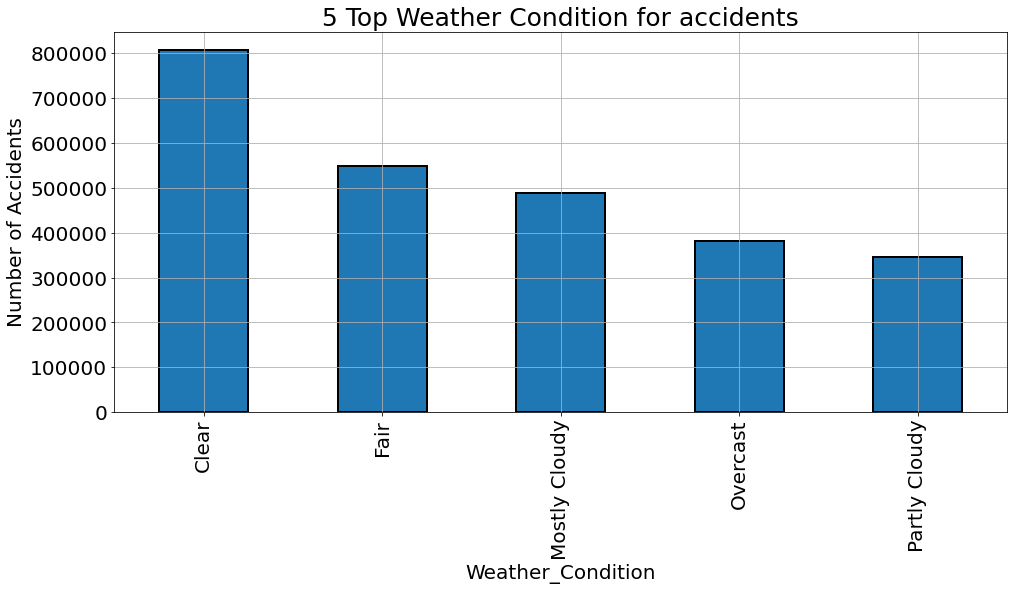

In [ ]:
fig, ax=plt.subplots(figsize=(16,7))
df['Weather_Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Weather_Condition',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('5 Top Weather Condition for accidents',fontsize=25)
plt.grid()
plt.ioff()

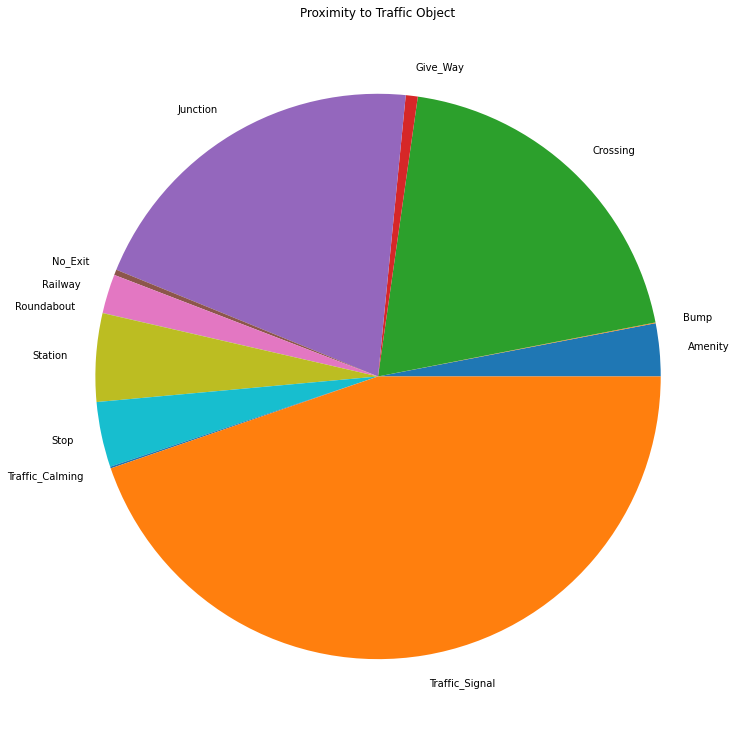

In [ ]:
bool_cols = [col for col in df.columns if df[col].dtype ==np.dtype('bool')]
booldf = df[bool_cols]
not_one_hot = booldf[booldf.sum(axis=1) > 1]
bools = booldf.sum(axis=0)
bools.plot.pie(figsize=(13,13))
plt.ylabel('')
plt.title('Proximity to Traffic Object');

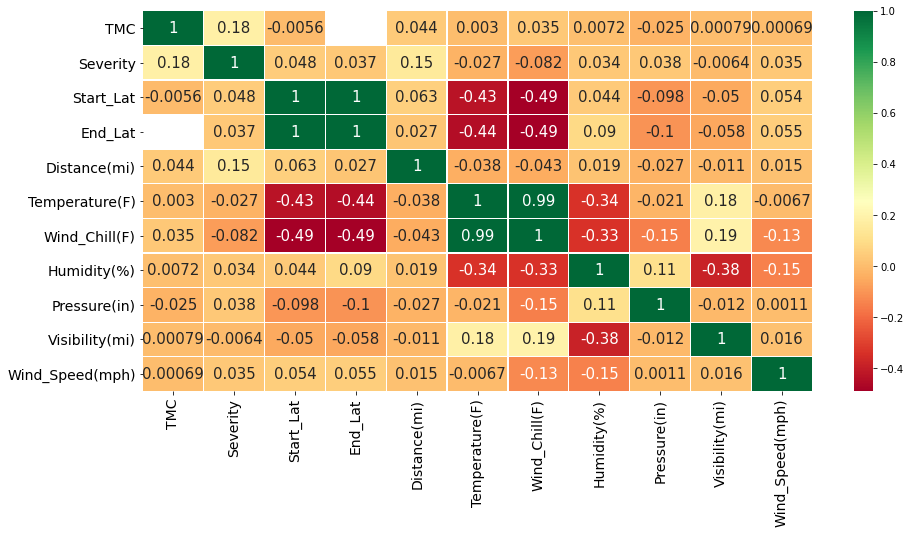

In [ ]:
fig=sns.heatmap(df[['TMC','Severity','Start_Lat','End_Lat','Distance(mi)','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':15})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

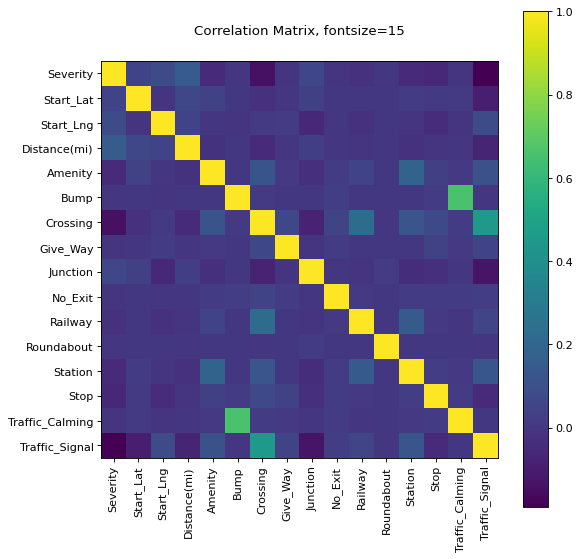

In [ ]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix, fontsize=15')
    plt.show()

plotCorrelationMatrix(df, 8)

In [ ]:
df1 = df.drop(['Distance(mi)', 'TMC', 'Country', 'Description', 'City', 'County', 'Street', 'Side', 'Zipcode', 'State', 'Airport_Code', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis=1)
df1

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Number,Timezone,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,A-1,MapQuest,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,NaN,US/Eastern,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
1,A-2,MapQuest,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,2584.0,US/Eastern,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
2,A-3,MapQuest,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,NaN,US/Eastern,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night
3,A-4,MapQuest,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,NaN,US/Eastern,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
4,A-5,MapQuest,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,NaN,US/Eastern,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,A-3513776,Bing,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,NaN,US/Pacific,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day
3513613,A-3513777,Bing,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,NaN,US/Pacific,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day
3513614,A-3513778,Bing,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,NaN,US/Pacific,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day
3513615,A-3513779,Bing,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,NaN,US/Pacific,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day


In [ ]:
cols = ["End_Lat", "End_Lng", "Number"]
df1 = df1.drop(cols, axis=1)
df1

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Timezone,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,A-1,MapQuest,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,US/Eastern,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
1,A-2,MapQuest,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,US/Eastern,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
2,A-3,MapQuest,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,US/Eastern,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night
3,A-4,MapQuest,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,US/Eastern,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
4,A-5,MapQuest,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,US/Eastern,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,A-3513776,Bing,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,US/Pacific,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day
3513613,A-3513777,Bing,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,US/Pacific,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day
3513614,A-3513778,Bing,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,US/Pacific,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day
3513615,A-3513779,Bing,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,US/Pacific,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day


In [ ]:
df1.isnull().sum()

ID                         0
Source                     0
Severity                   0
Start_Time                 0
End_Time                   0
Start_Lat                  0
Start_Lng                  0
Timezone                3880
Weather_Timestamp      43323
Temperature(F)         65732
Wind_Chill(F)        1868249
Humidity(%)            69687
Pressure(in)           55882
Visibility(mi)         75856
Wind_Direction         58874
Wind_Speed(mph)       454609
Precipitation(in)    2025874
Weather_Condition      76138
Amenity                    0
Bump                       0
Crossing                   0
Give_Way                   0
Junction                   0
No_Exit                    0
Railway                    0
Roundabout                 0
Station                    0
Stop                       0
Traffic_Calming            0
Traffic_Signal             0
Turning_Loop               0
Sunrise_Sunset           115
dtype: int64

In [ ]:
pmean = df1['Pressure(in)'].mean()
tmean = df1['Temperature(F)'].mean()
wcmean = df1['Wind_Chill(F)'].mean()
hmean = df1['Humidity(%)'].mean()
wsmean = df1['Wind_Speed(mph)'].mean()
prmean = df1['Precipitation(in)'].mean()

In [ ]:
df1['Pressure(in)']=df1['Pressure(in)'].fillna(pmean)


In [ ]:
df1['Temperature(F)'] = df1['Temperature(F)'].fillna(tmean)


In [ ]:
df1['Wind_Chill(F)'] = df1['Wind_Chill(F)'].fillna(wcmean)

In [ ]:
df1['Humidity(%)'] = df1['Humidity(%)'].fillna(hmean)

In [ ]:
df1['Wind_Speed(mph)'] = df1['Wind_Speed(mph)'].fillna(wsmean)

In [ ]:
df1['Precipitation(in)']=df1['Precipitation(in)'].fillna(prmean)

In [ ]:
df1.isnull().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Timezone              3880
Weather_Timestamp    43323
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)       75856
Wind_Direction       58874
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition    76138
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset         115
dtype: int64

In [ ]:
df1['Visibility(mi)'] = df1['Visibility(mi)'].fillna(df1['Visibility(mi)'].mode()[0])
df1['Wind_Direction'] = df1['Wind_Direction'].fillna(df1['Wind_Direction'].mode()[0])
df1['Weather_Condition'] = df1['Weather_Condition'].fillna(df1['Weather_Condition'].mode()[0])
df1['Sunrise_Sunset'] = df1['Sunrise_Sunset'].fillna(df1['Sunrise_Sunset'].mode()[0])

In [ ]:
df1.drop(['Timezone','Weather_Timestamp', 'Start_Time', 'End_Time', 'ID', 'Source'], axis = 1, inplace = True)


In [ ]:
df1.dropna(axis=0, inplace=True)


In [ ]:
df1.isnull().sum()

Severity             0
Start_Lat            0
Start_Lng            0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
Sunrise_Sunset       0
dtype: int64

In [ ]:
df1.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset'],
      dtype='object')

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['Amenity'] = label_encoder.fit_transform(df1['Amenity'])
df1['Bump'] = label_encoder.fit_transform(df1['Bump'])
df1['Crossing'] = label_encoder.fit_transform(df1['Crossing'])
df1['Give_Way'] = label_encoder.fit_transform(df1['Give_Way'])
df1['Junction'] = label_encoder.fit_transform(df1['Junction'])
df1['No_Exit'] = label_encoder.fit_transform(df1['No_Exit'])
df1['Railway'] = label_encoder.fit_transform(df1['Railway'])
df1['Roundabout'] = label_encoder.fit_transform(df1['Roundabout'])
df1['Station'] = label_encoder.fit_transform(df1['Station'])
df1['Stop'] = label_encoder.fit_transform(df1['Stop'])
df1['Traffic_Calming'] = label_encoder.fit_transform(df1['Traffic_Calming'])
df1['Traffic_Signal'] = label_encoder.fit_transform(df1['Traffic_Signal'])
df1['Turning_Loop'] = label_encoder.fit_transform(df1['Turning_Loop'])
df1['Sunrise_Sunset'] = label_encoder.fit_transform(df1['Sunrise_Sunset'])
df1['Weather_Condition'] = label_encoder.fit_transform(df1['Weather_Condition'])
df1['Wind_Direction'] = label_encoder.fit_transform(df1['Wind_Direction'])
df1

,Severity,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,3,39.865147,-84.058723,36.9,53.557295,91.0,29.68,10.0,1,8.219025,0.020000,55,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,39.928059,-82.831184,37.9,53.557295,100.0,29.65,10.0,1,8.219025,0.000000,55,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,39.063148,-84.032608,36.0,33.300000,100.0,29.67,10.0,16,3.500000,0.015983,78,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,3,39.747753,-84.205582,35.1,31.000000,96.0,29.64,9.0,16,4.600000,0.015983,75,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2,39.627781,-84.188354,36.0,33.300000,89.0,29.65,6.0,16,3.500000,0.015983,75,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,2,34.002480,-117.379360,86.0,86.000000,40.0,28.92,10.0,20,13.000000,0.000000,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3513613,2,32.766960,-117.148060,70.0,70.000000,73.0,29.39,10.0,16,6.000000,0.000000,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3513614,2,33.775450,-117.847790,73.0,73.000000,64.0,29.74,10.0,15,10.000000,0.000000,81,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3513615,2,33.992460,-118.403020,71.0,71.000000,81.0,29.62,10.0,16,8.000000,0.000000,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y=df1['Severity']
Y=Y-1

In [ ]:
X=df1.drop(['Severity'], axis = 1)
X

,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,39.865147,-84.058723,36.9,53.557295,91.0,29.68,10.0,1,8.219025,0.020000,55,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,39.928059,-82.831184,37.9,53.557295,100.0,29.65,10.0,1,8.219025,0.000000,55,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,39.063148,-84.032608,36.0,33.300000,100.0,29.67,10.0,16,3.500000,0.015983,78,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,39.747753,-84.205582,35.1,31.000000,96.0,29.64,9.0,16,4.600000,0.015983,75,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,39.627781,-84.188354,36.0,33.300000,89.0,29.65,6.0,16,3.500000,0.015983,75,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,34.002480,-117.379360,86.0,86.000000,40.0,28.92,10.0,20,13.000000,0.000000,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3513613,32.766960,-117.148060,70.0,70.000000,73.0,29.39,10.0,16,6.000000,0.000000,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3513614,33.775450,-117.847790,73.0,73.000000,64.0,29.74,10.0,15,10.000000,0.000000,81,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3513615,33.992460,-118.403020,71.0,71.000000,81.0,29.62,10.0,16,8.000000,0.000000,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Data Preprocessing

In [ ]:
#from sklearn.decomposition import PCA
# Make an instance of the Model
#pca = PCA()
#pca.fit(X)
#train_img = pca.transform(X)
#train = pd.DataFrame(train_img)
#train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,19.092732,30.632839,-8.254421,2.639633,-17.399095,-0.948109,2.280958,-0.891567,2.265108,-0.026906,0.483977,0.236715,-0.101213,0.006915,-0.013675,0.007793,-0.014382,-0.002810,-0.003439,-0.002198,-0.000594,-0.000468,-0.000060,-0.000032,1.137549e-21
1,20.924066,35.851998,-15.192290,1.299370,-15.805985,-0.760753,2.529063,-1.302978,2.686404,0.050705,0.466116,0.224536,-0.099404,0.009431,-0.014145,-0.013945,-0.014000,-0.002712,-0.003591,-0.002364,-0.000550,-0.000482,-0.000065,-0.000036,2.782646e-21
2,44.889401,40.404340,-1.260639,1.247024,1.277035,5.317194,-5.936917,0.341452,2.465362,0.335394,-0.140717,0.870385,0.023799,-0.429327,-0.043963,-0.003448,0.028611,-0.016903,0.022624,-0.005971,-0.000328,0.000163,-0.000134,-0.000027,6.808599e-21
3,41.427263,40.102111,2.835093,2.580490,2.005926,4.908492,-4.953247,-0.152203,1.335284,0.328652,0.494027,0.256337,-0.099777,0.010357,-0.014688,-0.005021,-0.011986,-0.003742,-0.002363,-0.001912,-0.000507,-0.000290,-0.000063,-0.000042,4.762486e-21
4,39.851002,34.283752,5.977578,4.262685,0.089337,4.930006,-6.047203,-0.044953,-2.056074,0.258982,-0.802111,0.236643,0.031984,-0.428738,-0.042817,-0.009872,0.027044,-0.017350,0.023156,-0.005671,-0.000024,0.000232,-0.000156,-0.000015,8.672309e-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,-39.655919,-41.756793,-6.588572,-14.361151,-3.385456,11.703217,4.266570,1.689939,-0.452687,0.378336,0.080225,-0.195067,-0.120711,-0.007779,-0.010965,-0.004740,-0.023252,0.002004,-0.005013,0.000422,-0.000794,-0.000365,0.000152,0.000031,-2.244067e-20
3513613,-31.301755,-4.397724,-14.903356,-22.504763,-0.484616,7.220131,-1.506320,3.310387,1.055131,0.180613,-0.142806,-0.359833,-0.112073,0.002984,-0.013392,-0.008003,-0.021583,0.002399,-0.006873,-0.000181,-0.000573,-0.000403,0.000102,-0.000008,-9.575892e-21
3513614,32.579812,-27.149875,-4.425750,-23.997897,-4.915098,6.074403,1.539857,2.528399,0.757851,-0.260793,0.055227,-0.379532,0.861726,-0.015893,-0.003109,-0.015013,-0.003004,0.001860,-0.005375,-0.000221,-0.001125,-0.000509,0.000085,-0.000493,9.012279e-20
3513615,-29.950779,-0.561918,-20.848693,-25.943881,0.585179,8.110975,0.815410,1.963571,1.519679,-0.059772,-0.161698,-0.348100,-0.118695,0.002137,-0.017365,-0.010605,-0.022209,0.001071,-0.007795,-0.000242,-0.000434,-0.000485,0.000077,-0.000005,-7.926399e-21


In [ ]:
from sklearn.preprocessing import StandardScaler

# Fit on training set only.
scaler = StandardScaler()

X = scaler.fit_transform(X)
X.shape

# Apply transform to both the training set and the test set.




(3513617, 25)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

# Model Implementation

In [ ]:
import pandas as pd
from pandas import set_option
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
from scipy import stats


from sklearn.model_selection import train_test_split, KFold, cross_val_score   
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import classification_report as cls_report
from sklearn.metrics import f1_score
from sklearn.feature_selection import VarianceThreshold



from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.neural_network import MLPClassifier       #Neural Network
from sklearn.svm import SVC                            #Support Vector Machine 
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from matplotlib import rcParams
rcParams['xtick.major.pad'] = 1
rcParams['ytick.major.pad'] = 1

## Logistic Regression

In [ ]:
# List of classification algorithms
algo_lst=['Logistic Regression',' K-Nearest Neighbors','Decision Trees','Random Forest']

# Initialize an empty list for the accuracy for each algorithm
accuracy_lst=[]


In [ ]:
lr = LogisticRegression(random_state=0)
lr.fit(scalar_train,Y_train)
y_pred=lr.predict(scalar_test)

# Get the accuracy score
acc=accuracy_score(Y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)
print('accuracy: ', knn.score(scalar_test, Y_test))
print("[Logistic regression algorithm] accuracy_score: {:.3f}.".format(acc))

[Logistic regression algorithm] accuracy_score: 0.675.


## KNN 

## nn

In [ ]:
import tensorflow as tf
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

batch_size = 32
epochs = 10

history = model.fit(
    X_train,
    Y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(),
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10
61489/61489 [==============================] - 79s 1ms/step - loss: 0.6943 - accuracy: 0.6816 - val_loss: 0.6815 - val_accuracy: 0.6887
Epoch 2/10
61489/61489 [==============================] - 77s 1ms/step - loss: 0.6786 - accuracy: 0.6895 - val_loss: 0.6759 - val_accuracy: 0.6918
Epoch 3/10
61489/61489 [==============================] - 77s 1ms/step - loss: 0.6734 - accuracy: 0.6926 - val_loss: 0.6702 - val_accuracy: 0.6961
Epoch 4/10
61489/61489 [==============================] - 76s 1ms/step - loss: 0.6699 - accuracy: 0.6947 - val_loss: 0.6664 - val_accuracy: 0.6964
Epoch 5/10
61489/61489 [==============================] - 77s 1ms/step - loss: 0.6674 - accuracy: 0.6964 - val_loss: 0.6659 - val_accuracy: 0.6967
Epoch 6/10
61489/61489 [==============================] - 77s 1ms/step - loss: 0.6656 - accuracy: 0.6975 - val_loss: 0.6645 - val_accuracy: 0.6972
Epoch 7/10
61489/61489 [==============================] - 76s 1ms/step - loss: 0.6644 - accuracy: 0.6984 - val_loss: 0

In [ ]:
print("Test Accuracy:", model.evaluate(X_test, Y_test, verbose=0)[1])

Test Accuracy: 0.6990643739700317


## DTC

In [ ]:
dt = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)


# Fit dt_entropy to the training set
dt.fit(X_train, Y_train)

# Use dt_entropy to predict test set labels
y_pred3= dt.predict(X_test)

# Evaluate accuracy_entropy
acc3 = accuracy_score(Y_test, y_pred3)
acc3


0.696012469570794

### Gini

In [ ]:
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)


# Fit dt_entropy to the training set
dt_gini.fit(X_train, Y_train)

# Use dt_entropy to predict test set labels
y_pred4= dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(Y_test, y_pred4)
accuracy_gini

0.6817441840608831

## rfc

In [ ]:
rfc=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,Y_train)

y_pred5=rfc.predict(X_test)


# Get the accuracy score
acc5=accuracy_score(Y_test, y_pred5)

acc5